In [1]:
#Importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Reading our Dataset
df=pd.read_csv('/content/drive/MyDrive/HighRadius/H2HBABBA1340.csv')

In [3]:
#Visualising our Data
df.head()

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
0,U001,CCU013,KRAFT F corporation,2019-11-27 00:00:00,2019.0,1.930058e+09,2019-11-01,20191028,20191101,20191101.0,USD,RV,1.0,NaN,11693.65,20191101.0,NAX2,1.930058e+09,0
1,U001,0200769623,WAL-MAR systems,NaN,2020.0,1.930584e+09,2020-03-01,20200229,20200301,20200316.0,USD,RV,1.0,NaN,9579.37,20200301.0,NAH4,1.930584e+09,1
2,U001,0200974851,RESTA us,2019-09-16 00:00:00,2019.0,1.929779e+09,2019-08-30,20190823,20190830,20190914.0,USD,RV,1.0,NaN,747.45,20190830.0,NAA8,1.929779e+09,0
3,U001,200761734,H E BUT foundation,2019-07-30 00:00:00,2019.0,1.929621e+09,2019-07-16,20190715,20190716,20190731.0,USD,RV,1.0,NaN,86873.23,20190716.0,NAA8,1.929621e+09,0
4,CA02,0140105686,SYSC corporation,2019-02-28 00:00:00,2019.0,2.960529e+09,2019-02-13,20190213,20190213,20190224.0,CAD,RV,1.0,NaN,39571.02,20190214.0,CA10,2.960529e+09,0


#**Start Of Preprocessing**

In [4]:
# Checking the Datatypes
df.dtypes


business_code              object
cust_number                object
name_customer              object
clear_date                 object
buisness_year             float64
doc_id                    float64
posting_date               object
document_create_date        int64
document_create_date.1      int64
due_in_date               float64
invoice_currency           object
document type              object
posting_id                float64
area_business             float64
total_open_amount         float64
baseline_create_date      float64
cust_payment_terms         object
invoice_id                float64
isOpen                      int64
dtype: object

In [5]:
#Converting the date columns to_datetime format
df['clear_date'] = pd.to_datetime(df['clear_date'])
df['posting_date'] = pd.to_datetime(df['posting_date'])
df['document_create_date'] = pd.to_datetime(df['document_create_date'], format='%Y%m%d')
df['document_create_date.1'] = pd.to_datetime(df['document_create_date.1'], format='%Y%m%d')
df['due_in_date'] = pd.to_datetime(df['due_in_date'], format='%Y%m%d')
df['baseline_create_date'] = pd.to_datetime(df['baseline_create_date'], format='%Y%m%d')

In [6]:
#Checking the new Datatype of the date columns
df.dtypes

business_code                     object
cust_number                       object
name_customer                     object
clear_date                datetime64[ns]
buisness_year                    float64
doc_id                           float64
posting_date              datetime64[ns]
document_create_date      datetime64[ns]
document_create_date.1    datetime64[ns]
due_in_date               datetime64[ns]
invoice_currency                  object
document type                     object
posting_id                       float64
area_business                    float64
total_open_amount                float64
baseline_create_date      datetime64[ns]
cust_payment_terms                object
invoice_id                       float64
isOpen                             int64
dtype: object

In [7]:
#Viewing the data of date columns in the new format YYYY-MM-DD
df[['clear_date','posting_date','document_create_date','document_create_date.1','due_in_date','baseline_create_date']]

,clear_date,posting_date,document_create_date,document_create_date.1,due_in_date,baseline_create_date
0,2019-11-27,2019-11-01,2019-10-28,2019-11-01,2019-11-01,2019-11-01
1,NaT,2020-03-01,2020-02-29,2020-03-01,2020-03-16,2020-03-01
2,2019-09-16,2019-08-30,2019-08-23,2019-08-30,2019-09-14,2019-08-30
3,2019-07-30,2019-07-16,2019-07-15,2019-07-16,2019-07-31,2019-07-16
4,2019-02-28,2019-02-13,2019-02-13,2019-02-13,2019-02-24,2019-02-14
...,...,...,...,...,...,...
49995,2019-08-16,2019-07-31,2019-08-01,2019-07-31,2019-08-15,2019-07-31
49996,2019-12-27,2019-12-13,2019-12-14,2019-12-13,2019-12-28,2019-12-13
49997,2019-12-24,2019-12-13,2019-12-13,2019-12-13,2019-12-28,2019-12-13
49998,2020-03-17,2020-02-02,2020-01-31,2020-02-02,2020-03-18,2020-02-02


In [8]:
df.isnull().sum()

business_code                 0
cust_number                   0
name_customer                 0
clear_date                10000
buisness_year                 0
doc_id                        0
posting_date                  0
document_create_date          0
document_create_date.1        0
due_in_date                   0
invoice_currency              0
document type                 0
posting_id                    0
area_business             50000
total_open_amount             0
baseline_create_date          0
cust_payment_terms            0
invoice_id                    1
isOpen                        0
dtype: int64

In [9]:
#Droping the 'area_business' column since it holds all NULL values
df.drop('area_business',axis=1, inplace=True)

In [10]:
#Identifying the row which contains a NULL value for invoice_id
df.loc[df.invoice_id.isnull(),:]

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
35460,CA02,0140104429,COSTCO co,2019-05-22,2019.0,9.500000e+09,2019-03-29,2019-03-29,2019-03-22,2019-04-01,CAD,X2,1.0,5353.2,2019-03-22,CA10,NaN,0


In [11]:
#Droping the row containing NULL in invoice_id
df.drop([35460],axis=0,inplace=True)

In [12]:
#Checking the count of NULL values in each column
df.isnull().sum()

business_code                 0
cust_number                   0
name_customer                 0
clear_date                10000
buisness_year                 0
doc_id                        0
posting_date                  0
document_create_date          0
document_create_date.1        0
due_in_date                   0
invoice_currency              0
document type                 0
posting_id                    0
total_open_amount             0
baseline_create_date          0
cust_payment_terms            0
invoice_id                    0
isOpen                        0
dtype: int64

In [13]:
#Checking for count of duplicate rows in the entire dataset
df.duplicated().sum()

1128

In [14]:
#Droping the duplicate rows and creating a new DataFrame 'df1' 
df1=df.drop_duplicates()

In [15]:
#Checking the number of rows
#[No of rows in df1(48871) + No of duplicate rows(1128) + No of row having 'invoice_id' as NULL(1) =Total No of Rows in the Initial Dataset(50000)]
df1.shape

(48871, 18)

In [16]:
#Identifying the columns with constant values, here, 'posting_id','document type'.
df1.apply(pd.Series.nunique)

business_code                 6
cust_number                1419
name_customer              4199
clear_date                  393
buisness_year                 2
doc_id                    48871
posting_date                504
document_create_date        506
document_create_date.1      504
due_in_date                 548
invoice_currency              2
document type                 1
posting_id                    1
total_open_amount         44357
baseline_create_date        504
cust_payment_terms           72
invoice_id                48871
isOpen                        2
dtype: int64

In [17]:
#Removing the constant column 'posting_id','document type'
df1 = df1.loc[:,df1.apply(pd.Series.nunique) != 1]

In [18]:
#Checking the number of Columns, here 16 after removing the two Columns('posting_id','document type') having Constant values
df1.shape

(48871, 16)

In [19]:
#Sorting the values on the basis of 'posting_date'
df1.sort_values('posting_date')

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
8475,U001,0200707822,PUBLI trust,2019-01-14,2019.0,1.928533e+09,2018-12-30,2018-12-29,2018-12-30,2019-01-14,USD,24444.04,2018-12-30,NAA8,1.928533e+09,0
38901,U001,0200769623,WAL-MAR,2019-01-09,2019.0,1.928538e+09,2018-12-30,2018-12-29,2018-12-30,2019-01-14,USD,51600.07,2018-12-30,NAH4,1.928538e+09,0
20835,U013,0140103713,PRIM foundation,2019-01-22,2019.0,1.991819e+09,2018-12-30,2018-12-26,2018-12-30,2019-01-29,USD,61317.91,2018-12-30,NAVE,1.991819e+09,0
567,U001,0200769623,WAL-MAR corp,2019-01-09,2019.0,1.928539e+09,2018-12-30,2018-12-29,2018-12-30,2019-01-14,USD,51583.16,2018-12-30,NAH4,1.928539e+09,0
47090,U001,0200769623,WAL-MAR foundation,2019-01-09,2019.0,1.928538e+09,2018-12-30,2018-12-29,2018-12-30,2019-01-14,USD,44346.56,2018-12-30,NAH4,1.928538e+09,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5422,CA02,0100027744,OMEGA AD trust,NaT,2020.0,2.960634e+09,2020-05-16,2020-05-16,2020-05-16,2020-05-16,CAD,1440.00,2020-05-16,CAB1,2.960634e+09,1
1980,U001,0200759878,SA associates,NaT,2020.0,1.930897e+09,2020-05-17,2020-05-13,2020-05-17,2020-06-01,USD,22835.50,2020-05-17,NAH4,1.930897e+09,1
48814,U001,100026809,PRES trust,NaT,2020.0,1.930917e+09,2020-05-19,2020-05-19,2020-05-19,2020-05-29,USD,7043.75,2020-05-19,NA10,1.930917e+09,1
21786,CA02,0140105785,SHOPPE,NaT,2020.0,2.960636e+09,2020-05-19,2020-05-19,2020-05-19,2020-05-29,CAD,935.09,2020-05-19,CA10,2.960636e+09,1


In [20]:
#Splitting the Dataset into Test(where 'clear_date' is NULL i.e The customer is yet to make payment) and Train datasets(where 'clear_date' is Present i.e Customer had already paid)
main_test=df1[df1['clear_date'].isnull()]
main_train=df1[df1['clear_date'].notnull()]

In [21]:
#Identifying the columns with constant values, here, 'isOpen'
main_train.apply(pd.Series.nunique)

business_code                 6
cust_number                1336
name_customer              3950
clear_date                  393
buisness_year                 2
doc_id                    39190
posting_date                423
document_create_date        426
document_create_date.1      423
due_in_date                 489
invoice_currency              2
total_open_amount         35708
baseline_create_date        429
cust_payment_terms           70
invoice_id                39190
isOpen                        1
dtype: int64

In [22]:
#Removing the constant column 'isOpen'
main_train = main_train.loc[:,main_train.apply(pd.Series.nunique) != 1]

**END Of Preprocessing**


#**Start of EDA** 

In [23]:
#Calculating delay in payment by subtracting due_in_date from clear_date
main_train['delay']=(main_train['clear_date']-main_train['due_in_date']).dt.days.astype('int16')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


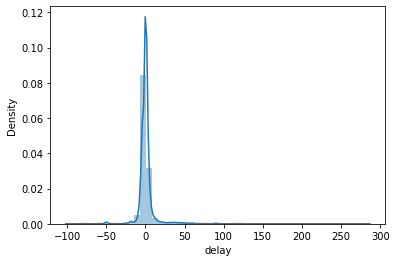

In [24]:
#Checking for outliers/skew in the Delay
sns.distplot(main_train['delay'])

In [25]:
#Skew and outliers are present so need to remove them
min_threshold, max_threshold=main_train.delay.quantile([0.001,0.999])
min_threshold, max_threshold
main_train=main_train[(main_train.delay<max_threshold) & (main_train.delay>min_threshold)]

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


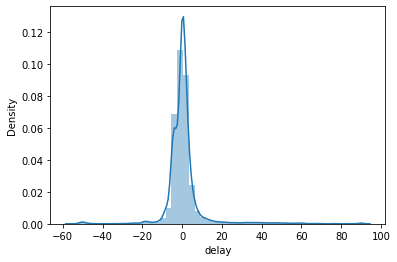

In [26]:
#Plotting Delay after removing outliers and reducing the skew
sns.distplot(main_train['delay'])

In [27]:
#Splitting the main_train data frame into X and Y 
Y=pd.DataFrame(main_train['delay'])
X=main_train.drop(['delay'],axis=1)

In [28]:
#Splitting X and Y further into train(80%) and validate(20%) data sets 
from sklearn.model_selection import train_test_split
X_train,X_val,Y_train,Y_val=train_test_split(X,Y,test_size=0.2,random_state=0,shuffle=False)

**END of EDA**

#**Start of Feature Engineering**

In [ ]:
from sklearn.preprocessing import LabelEncoder
object_columns = ['business_code','cust_number','name_customer','invoice_currency','cust_payment_terms']
date_columns=['clear_date','posting_date','document_create_date','document_create_date.1','due_in_date','baseline_create_date']

# make an encoder object
encoder = LabelEncoder()

# Adding encoded columns and removing normal object_columns
for col in object_columns:
  enc=col+'_enc'
  encoder.fit(pd.concat([X_train[col], X_val[col]], axis=0, sort=False))
  #Adding encoded columns
  X_train[enc] = encoder.transform(X_train[col])
  X_val[enc] = encoder.transform(X_val[col])
  #Dropping columns which are already encoded 
  X_train.drop(col,axis=1,inplace=True)
  X_val.drop(col,axis=1,inplace=True)

# Adding encoded columns and removing normal date_columns
for col in date_columns:
  enc=col+'_enc'
  #Adding encoded columns  
  X_train[enc]=(X_train[col]-pd.to_datetime('1970-01-01')).dt.days.astype('int16')
  X_val[enc]=(X_val[col]-pd.to_datetime('1970-01-01')).dt.days.astype('int16')
  #Dropping columns which are already encoded 
  X_train.drop(col,axis=1,inplace=True)
  X_val.drop(col,axis=1,inplace=True)

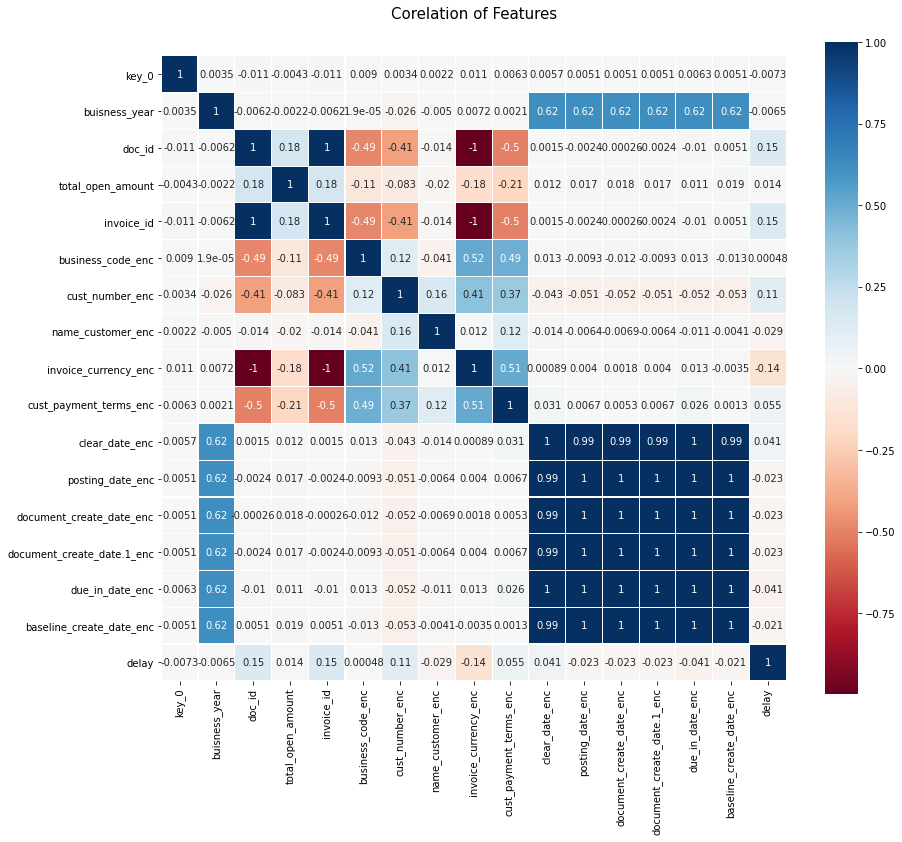

In [30]:
#Plotting Correlation
colormap = plt.cm.RdBu
plt.figure(figsize=(14,12))
plt.title('Corelation of Features',y=1.05,size=15)
sns.heatmap(X_train.merge(Y_train,on=X_train.index).corr(),linewidths=0.1,vmax=1.0,square=True, cmap=colormap, linecolor='white', annot=True)

In [31]:
#Observation:
# The following fields are highly correlated :
#'doc_id','invoice_id','cust_number_enc','invoice_currency_enc',due_in_date_enc','cust_payment_terms_enc'

In [32]:
#Creating the model with the above mentioned 6 fields as driving fields
X_train_new=X_train[['doc_id','invoice_id','cust_number_enc','invoice_currency_enc','due_in_date_enc','cust_payment_terms_enc']]
X_val_new=X_val[['doc_id','invoice_id','cust_number_enc','invoice_currency_enc','due_in_date_enc','cust_payment_terms_enc']]

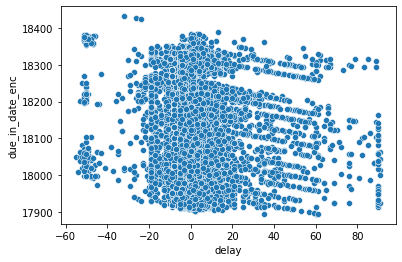

In [33]:
#Plotting delay vs due_in_date_enc to check which model is better
sns.scatterplot(data=X_train_new.merge(Y_train,on=X_train_new.index),x='delay', y='due_in_date_enc')

In [34]:
#Observation of Scatter Plot:
#There is NO Linear Relation so proceeding with Tree Model 

**End of Feature Engineering**

#**Start of Machine Learning Model**

In [35]:
from sklearn.tree import DecisionTreeRegressor
tree_model=DecisionTreeRegressor()

In [36]:
#Hyper-parameter Tuning
param_dist={
    "min_samples_split":[1,2,3,5],
    "max_depth":[1,2,3,4,5,6,7,None],
}
from sklearn.model_selection import GridSearchCV
grid=GridSearchCV(tree_model,param_grid=param_dist,cv=10,n_jobs=-1)
grid.fit(X_train_new,Y_train)
grid.best_score_,grid.best_params_

(0.4985914073711917, {'max_depth': 7, 'min_samples_split': 2})

In [55]:
#The best parameters are : {'max_depth': 7, 'min_samples_split': 2}
tree_model=DecisionTreeRegressor(max_depth=7,min_samples_split=2)
tree_model.fit(X_train_new,Y_train)

# Predicting the validation set results
Tree_predicted_validation=tree_model.predict(X_val_new)

In [56]:
#Calculating the Mean Squared Error, Root Mean Squared Error and r2 score of DecisionTreeRegressor model
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import math
print("Mse:",mean_squared_error(Y_val,Tree_predicted_validation))
print("Rmse:",np.sqrt(mean_squared_error(Y_val,Tree_predicted_validation)))
print("r2 score:",(abs(r2_score(Y_val,Tree_predicted_validation)))*100)

Mse: 50.80330134283377
Rmse: 7.127643463504174
r2 score: 47.77370899924396


In [57]:
#Observation:
#DecisionTreeRegressor model is giving an Mse value of 50.80, so trying a different model, here, RandomForestRegressor model

In [ ]:
from sklearn.ensemble import RandomForestRegressor
clf = RandomForestRegressor()
clf.fit(X_train_new,Y_train)

# Predicting the validation set results
clf_predicted_validation = clf.predict(X_val_new)


In [59]:
print("Mse:",mean_squared_error(Y_val,clf_predicted_validation))
print("Rmse:",np.sqrt(mean_squared_error(Y_val,clf_predicted_validation)))
print("r2 score:",(abs(r2_score(Y_val,clf_predicted_validation)))*100)

Mse: 46.39331186886559
Rmse: 6.811263602949572
r2 score: 52.3072213397805


In [60]:
#Observation:
#DecisionTreeRegressor model is giving an Mse value of 50.80, RandomForestRegressor model is giving an mse value of 46.39
#So choosing the RandomForestRegressor model for predicting clear date.

In [61]:
#Showing the Actual Clear date and Predicted Clear Date side by side
pd.DataFrame(zip(pd.to_datetime('1970-01-01') + pd.to_timedelta(X_val['clear_date_enc'],unit='d'),
                 pd.to_datetime('1970-01-01')+pd.to_timedelta((X_val_new['due_in_date_enc']+clf_predicted_validation).astype('int16'),unit='d')),
             columns=["Actual Clear Date","Predicted Clear Date"])

,Actual Clear Date,Predicted Clear Date
0,2019-12-20,2019-12-18
1,2019-08-06,2019-08-06
2,2019-09-06,2019-09-05
3,2019-12-16,2019-12-14
4,2019-01-28,2019-01-25
...,...,...
7816,2019-08-16,2019-08-15
7817,2019-12-27,2019-12-28
7818,2019-12-24,2019-12-24
7819,2020-03-17,2020-03-18


**End of Model Training and Validation.**


**Trained Model is : clf**

#**Testing the model on main_test** 

In [62]:
#Creating custom Dataset from Main Test based on the columns on which we trained our model
main_test_cust=main_test[['doc_id','invoice_id','cust_number','invoice_currency','due_in_date','cust_payment_terms']]

In [63]:
#Checking the datatypes of the main_test_cust
main_test_cust.dtypes

doc_id                       float64
invoice_id                   float64
cust_number                   object
invoice_currency              object
due_in_date           datetime64[ns]
cust_payment_terms            object
dtype: object

In [ ]:
#Need to Encode the object and datetime fields
object_columns = ['cust_number','invoice_currency','cust_payment_terms']
date_columns=['due_in_date']


# make an encoder object
encoder = LabelEncoder()

# Adding encoded columns and removing normal object_columns
for col in object_columns:
  enc=col+'_enc'
  encoder.fit(pd.concat([main_test_cust[col], main_test_cust[col]], axis=0, sort=False))
  #Adding encoded columns
  main_test_cust[enc] = encoder.transform(main_test_cust[col])
  #Dropping columns which are already encoded 
  main_test_cust.drop(col,axis=1,inplace=True)

# Adding encoded columns and removing normal date_columns
for col in date_columns:
  enc=col+'_enc'
  #Adding encoded columns  
  main_test_cust[enc]=(main_test_cust[col]-pd.to_datetime('1970-01-01')).dt.days.astype('int16')
  #Dropping columns which are already encoded 
  main_test_cust.drop(col,axis=1,inplace=True)

In [65]:
#Predicting delay using the main_train_cust data
clf_predicted_test=clf.predict(main_test_cust)

In [ ]:
#Storing the Predicted Delay in a column in main_test_cust.
main_test_cust['predicted_delay']=pd.to_timedelta((clf_predicted_test).astype('int16'),unit='d').days.astype('int16')

In [67]:
#Showing the predicted delay column.
main_test_cust['predicted_delay']

1        38
8        38
13       39
15       59
17       38
         ..
49978    38
49981    38
49983    38
49988    51
49994    38
Name: predicted_delay, Length: 9681, dtype: int64

In [ ]:
#Calculating predicted_clear_date
main_test["predicted_clear_date"]=pd.to_datetime('1970-01-01') + pd.to_timedelta(main_test_cust['due_in_date_enc']+(clf_predicted_test).astype('int16'),unit='d')

In [ ]:
# Creating Bucket based on the predicted clear date
main_test["Aging_Bucket"] = main_test_cust['predicted_delay'].apply(lambda x: ">60 days" if x > 60 else ("45-60 days" if x>45 else ("31-45 days" if x >30 else ("16-30 days" if x>15 else "0-15 days"))))


In [70]:
#Showing the "due_in_date","predicted_clear_date","Aging_Bucket" in main_test
main_test[["due_in_date","predicted_clear_date","Aging_Bucket"]]

,due_in_date,predicted_clear_date,Aging_Bucket
1,2020-03-16,2020-04-23,31-45 days
8,2020-04-04,2020-05-12,31-45 days
13,2020-05-14,2020-06-22,31-45 days
15,2020-05-27,2020-07-25,45-60 days
17,2020-04-13,2020-05-21,31-45 days
...,...,...,...
49978,2020-04-25,2020-06-02,31-45 days
49981,2020-04-29,2020-06-06,31-45 days
49983,2020-04-02,2020-05-10,31-45 days
49988,2020-05-23,2020-07-13,45-60 days


In [71]:
#Showing main_test 
main_test

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen,predicted_clear_date,Aging_Bucket
1,U001,0200769623,WAL-MAR systems,NaT,2020.0,1.930584e+09,2020-03-01,2020-02-29,2020-03-01,2020-03-16,USD,9579.37,2020-03-01,NAH4,1.930584e+09,1,2020-04-23,31-45 days
8,CA02,0140104409,LOB foundation,NaT,2020.0,2.960623e+09,2020-03-22,2020-03-22,2020-03-22,2020-04-04,CAD,127991.65,2020-03-25,CA10,2.960623e+09,1,2020-05-12,31-45 days
13,U001,0200418007,AM us,NaT,2020.0,1.930624e+09,2020-03-10,2020-03-09,2020-03-10,2020-05-14,USD,14220.00,2020-03-10,NAGD,1.930624e+09,1,2020-06-22,31-45 days
15,U001,200769623,WAL-MAR co,NaT,2020.0,1.930898e+09,2020-05-12,2020-05-13,2020-05-12,2020-05-27,USD,943.12,2020-05-12,NAH4,1.930898e+09,1,2020-07-25,45-60 days
17,U001,0200769623,WAL-MAR foundation,NaT,2020.0,1.930719e+09,2020-03-29,2020-03-29,2020-03-29,2020-04-13,USD,41456.51,2020-03-29,NAH4,1.930719e+09,1,2020-05-21,31-45 days
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49978,U001,0200769623,WAL-MAR llc,NaT,2020.0,1.930765e+09,2020-04-10,2020-04-09,2020-04-10,2020-04-25,USD,41851.42,2020-04-10,NAH4,1.930765e+09,1,2020-06-02,31-45 days
49981,U001,0200739534,OK llc,NaT,2020.0,1.930784e+09,2020-04-14,2020-04-14,2020-04-14,2020-04-29,USD,45929.14,2020-04-14,NAA8,1.930784e+09,1,2020-06-06,31-45 days
49983,U001,0200705742,DOT trust,NaT,2020.0,1.930582e+09,2020-02-28,2020-02-28,2020-02-28,2020-04-02,USD,476.90,2020-02-28,NAAW,1.930582e+09,1,2020-05-10,31-45 days
49988,U001,200744019,TARG in,NaT,2020.0,1.930878e+09,2020-05-08,2020-05-08,2020-05-08,2020-05-23,USD,4782.85,2020-05-08,NAA8,1.930878e+09,1,2020-07-13,45-60 days
